In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 


In [4]:
BTC = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Bitcoin/BTC-USD.csv', date_parser = True)
BTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


In [5]:
ETH = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Ethereum/ETH-USD.csv', date_parser = True)
ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


In [6]:
BNB = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/BinanceCoin/BNB-USD.csv', date_parser = True)
BNB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,16.263498,16.370699,15.539147,15.715951,15.715951,213428131
1,2019-12-01,15.743181,15.743181,15.054234,15.496336,15.496336,203268417
2,2019-12-02,15.509364,15.707174,15.152545,15.191858,15.191858,200809249
3,2019-12-03,15.191858,15.553175,15.048669,15.309556,15.309556,219927266
4,2019-12-04,15.348430,15.690587,15.009685,15.279978,15.279978,237605471
...,...,...,...,...,...,...,...
1092,2022-11-26,300.571747,316.962128,300.389465,311.388458,311.388458,1221554861
1093,2022-11-27,311.372040,316.219879,307.156372,307.429291,307.429291,793779029
1094,2022-11-28,307.399567,309.096100,289.493683,293.527252,293.527252,1154829072
1095,2022-11-29,293.491821,304.822815,289.763641,295.498169,295.498169,986451640


In [7]:
FTT = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/FTX/FTT-USD.csv', date_parser = True)
FTT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,1.501756,1.517845,1.460168,1.473047,1.473047,8396595
1,2019-12-01,1.473410,1.480934,1.425907,1.476954,1.476954,9944409
2,2019-12-02,1.476461,1.512531,1.448838,1.492000,1.492000,9514150
3,2019-12-03,1.492000,1.583356,1.492000,1.550795,1.550795,7624523
4,2019-12-04,1.550717,1.819642,1.526406,1.800696,1.800696,11150378
...,...,...,...,...,...,...,...
1092,2022-11-26,1.401195,1.429898,1.349244,1.364939,1.364939,43773375
1093,2022-11-27,1.364506,1.384601,1.315469,1.315469,1.315469,7301184
1094,2022-11-28,1.315751,1.329345,1.281961,1.295093,1.295093,6250102
1095,2022-11-29,1.294036,1.322258,1.278124,1.303769,1.303769,4903379


In [10]:
#Replace None or Null values with forward filling technique using fillna function.

BTC = BTC.fillna(method = 'ffill')
ETH = ETH.fillna(method = 'ffill')
BNB = BNB.fillna(method = 'ffill')
FTT = FTT.fillna(method = 'ffill')

In [11]:
#Convert Date column into Datatime format

BTC['Date'] = pd.to_datetime(BTC.Date)
ETH['Date'] = pd.to_datetime(ETH.Date)
BNB['Date'] = pd.to_datetime(BNB.Date)
FTT['Date'] = pd.to_datetime(FTT.Date)

Text(0.5, 1.0, 'FTX Close Price')

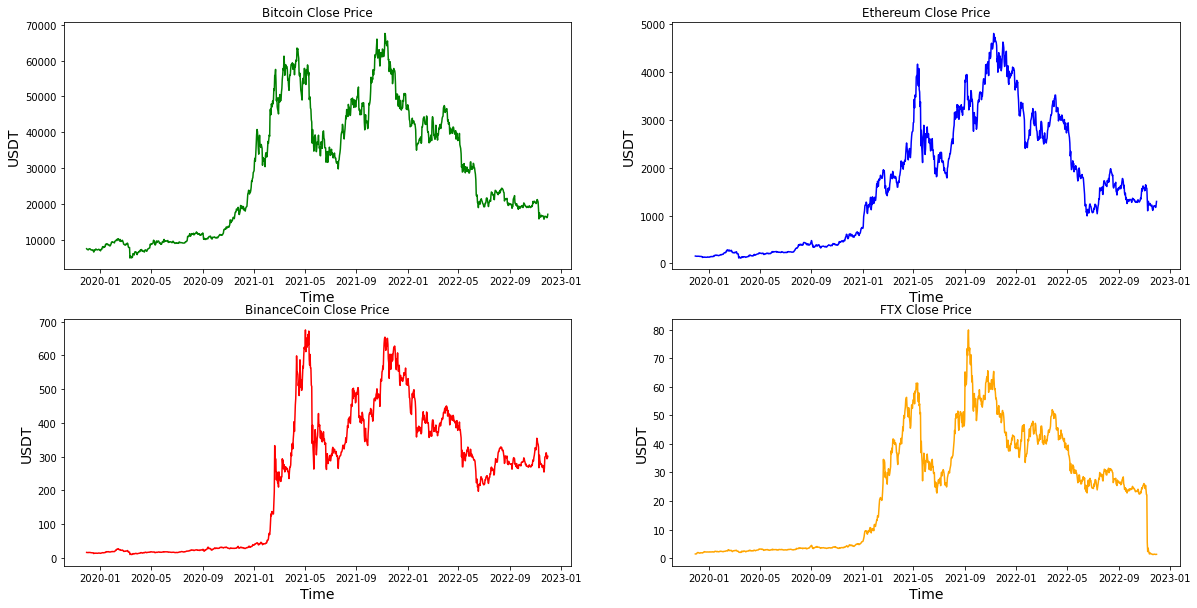

In [16]:
fig = plt.figure(figsize = (20,10))

plt.subplot(2, 2, 1)
plt.plot(BTC['Date'], BTC['Close'], color="green")
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(ETH['Date'], ETH['Close'], color="blue")
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.title('Ethereum Close Price')

plt.subplot(2, 2, 3)
plt.plot(BNB['Date'], BNB['Close'], color="red")
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.title('BinanceCoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(FTT['Date'], FTT['Close'], color="orange")
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.title('FTX Close Price')